# Tarefa 08 - Parte 3

In [32]:
from PIL import Image as img
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt

papagaio = img.open("papagaio_colorido.jpg")

#cria o mapa de pixels
def pixelMap(image):
    return image.load()

def plot(img1, img2, img3):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Original')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Vizinhança 4')
    
    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(img3)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Vizinhança 8')

def add_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]+2), int(img1.size[1]+2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            px0[i+1, j+1] = px1[i,j]
    return img0

def del_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]-2), int(img1.size[1]-2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            px0[i,j] = px1[i+1, j+1]
    return img0

def f_laplaciano(image, n):
    img = image.copy()
    px = pixelMap(img)
    
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    v4 = [[0,-1,0],[-1,4,-1],[0,-1,0]]
    v8 = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]
    if n == 4:
        for i in range(1,(img.size[0]-1)):
            for j in range(1,(img.size[1]-1)):
                r = int( (px[i-1,j-1][0]*v4[0][0] + px[i,j-1][0]*v4[0][1] + px[i+1,j-1][0]*v4[0][2] +
                          px[i-1,j][0]*v4[1][0]   + px[i,j][0]*v4[1][1]   + px[i+1,j][0]*v4[1][2]   +
                          px[i-1,j+1][0]*v4[2][0] + px[i,j+1][0]*v4[2][1] + px[i+1,j+1][0]*v4[2][2] )*(1/4)+(px[i,j][0]) )

                g = int( (px[i-1,j-1][1]*v4[0][0] + px[i,j-1][1]*v4[0][1] + px[i+1,j-1][1]*v4[0][2] +
                          px[i-1,j][1]*v4[1][0]   + px[i,j][1]*v4[1][1]   + px[i+1,j][1]*v4[1][2]   +
                          px[i-1,j+1][1]*v4[2][0] + px[i,j+1][1]*v4[2][1] + px[i+1,j+1][1]*v4[2][2] )*(1/4)+(px[i,j][1]) )

                b = int( (px[i-1,j-1][2]*v4[0][0] + px[i,j-1][2]*v4[0][1] + px[i+1,j-1][2]*v4[0][2] +
                          px[i-1,j][2]*v4[1][0]   + px[i,j][2]*v4[1][1]   + px[i+1,j][2]*v4[1][2]   +
                          px[i-1,j+1][2]*v4[2][0] + px[i,j+1][2]*v4[2][1] + px[i+1,j+1][2]*v4[2][2] )*(1/4)+(px[i,j][2]) )
                px1[i,j] = (r,g,b)
        return img1
    elif n == 8:
        for i in range(1,(img.size[0]-1)):
            for j in range(1,(img.size[1]-1)):
                r = int( ((px[i-1,j-1][0]*v8[0][0]) + (px[i,j-1][0]*v8[0][1]) + (px[i+1,j-1][0]*v8[0][2]) +
                          (px[i-1,j][0]*v8[1][0])   + (px[i,j][0]*v8[1][1])   + (px[i+1,j][0]*v8[1][2])   +
                          (px[i-1,j+1][0]*v8[2][0]) + (px[i,j+1][0]*v8[2][1]) + (px[i+1,j+1][0]*v8[2][2]) )*(1/8)+(px[i,j][0]) )

                g = int( (px[i-1,j-1][1]*v8[0][0] + px[i,j-1][1]*v8[0][1] + px[i+1,j-1][1]*v8[0][2] +
                          px[i-1,j][1]*v8[1][0]   + px[i,j][1]*v8[1][1]   + px[i+1,j][1]*v8[1][2]   +
                          px[i-1,j+1][1]*v8[2][0] + px[i,j+1][1]*v8[2][1] + px[i+1,j+1][1]*v8[2][2] )*(1/8)+(px[i,j][1]) )

                b = int( (px[i-1,j-1][2]*v8[0][0] + px[i,j-1][2]*v8[0][1] + px[i+1,j-1][2]*v8[0][2] +
                          px[i-1,j][2]*v8[1][0]   + px[i,j][2]*v8[1][1]   + px[i+1,j][2]*v8[1][2]   +
                          px[i-1,j+1][2]*v8[2][0] + px[i,j+1][2]*v8[2][1] + px[i+1,j+1][2]*v8[2][2] )*(1/8)+(px[i,j][2]) )
                px1[i,j] = (r,g,b)
        return img1
    else:
        print("A vizinhança deve ter tamanho 4 ou 8!!!")

In [33]:
vz4 = add_fronteira(papagaio)
vz4 = f_laplaciano(vz4,4)
vz4 = del_fronteira(vz4)

vz8 = add_fronteira(papagaio)
vz8 = f_laplaciano(vz8,8)
vz8 = del_fronteira(vz8)

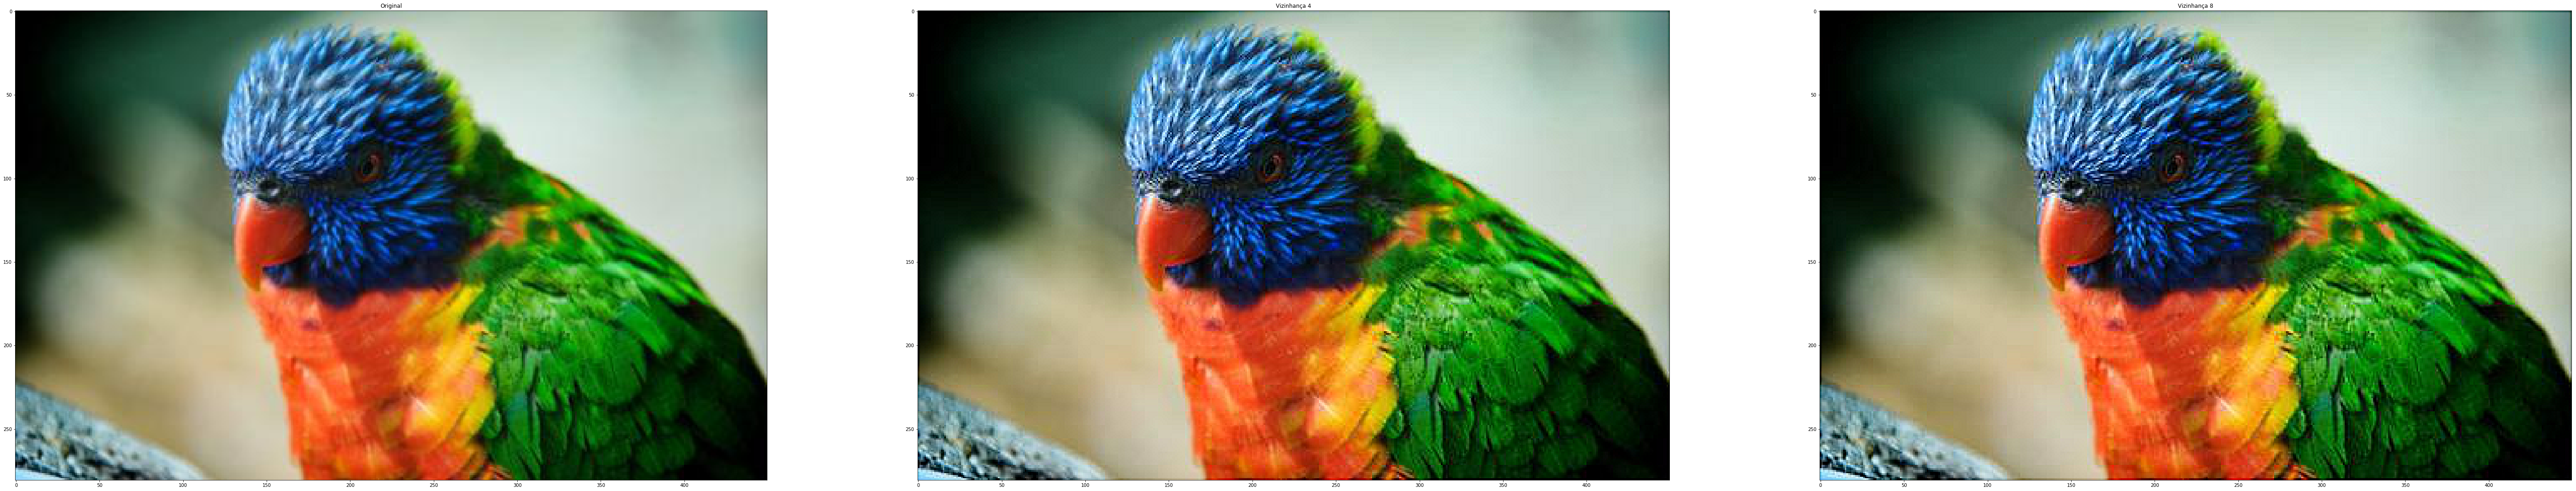

In [34]:
plot(papagaio, vz4, vz8)

## Salvando os arquivos:

In [36]:
papagaio.save("./resource/img/Tarefa08/parte03/papagaio_colorido.jpg")
vz4.save("./resource/img/Tarefa08/parte03/papagaio_vizinhança_4.jpg")
vz8.save("./resource/img/Tarefa08/parte03/papagaio_vizinhança_8.jpg")